In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df= pd.read_csv('/content/drive/MyDrive/INSAID/Fraud.csv')
df.shape

(6362620, 11)

In [ ]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [ ]:
df.isnull().sum()     #to check null values

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [ ]:
df['isFraud'].value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

As count of Fraud Transaction is too less as compared to legal (no fraud ) transaction . So it is Imbalanced data ,as the No_Fraud Class has very high number of observations and the Is_Fraud Class has very low number of observations .Hence for an Imbalaced Class dataset F1 score is the most appropriate metric.

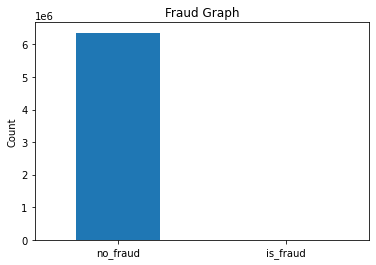

Number of Is Fraud transactions:  8213
Number of No Fraud transactions:  6354407
Percentage of Fraud transactions: 0.129 % 
Percentage of No Fraud transactions: 99.871 % 


In [ ]:
import matplotlib.pyplot as plt
labels = ["no_fraud", "is_fraud"]
df['isFraud'].value_counts().plot(kind = "bar", rot = 0)
plt.title("Fraud Graph")
plt.ylabel("Count")
plt.xticks(range(2), labels)
plt.show()

total=len(df.isFraud)
is_fraud = len(df[df.isFraud == 1])
print("Number of Is Fraud transactions: ",is_fraud)
no_fraud = len(df[df.isFraud == 0])
print("Number of No Fraud transactions: ",no_fraud)
isfraud_percent=(is_fraud / total)* 100
print("Percentage of Fraud transactions: {:.3f} % ".format(isfraud_percent))
nofraud_percent=(no_fraud / total)* 100
print("Percentage of No Fraud transactions: {:.3f} % ".format(nofraud_percent))

**Multicollinearity :-**
For finding multicollinearity create a correlation Heat Map and find which features are highly correlated and drop it from dataset.Another method is like we can check Varience Inflation Factor , and the features with same VIF are correlated.

           feature         VIF
0             step    2.791610
1             type    4.467405
2           amount    4.149312
3         nameOrig    2.764234
4    oldbalanceOrg  576.803777
5   newbalanceOrig  582.709128
6         nameDest    3.300975
7   oldbalanceDest   73.349937
8   newbalanceDest   85.005614
9          isFraud    1.195305
10  isFlaggedFraud    1.002587


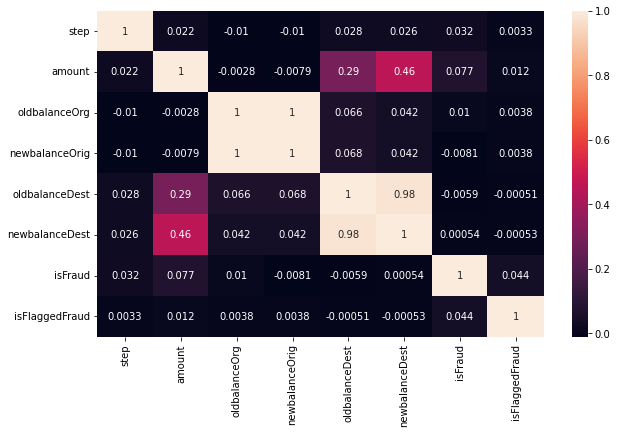

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
corr=df.corr()

plt.figure(figsize=(10,6))
sns.heatmap(corr,annot=True)

from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df["type"] = label_encoder.fit_transform(df["type"].astype(str))
df["nameOrig"] = label_encoder.fit_transform(df["nameOrig"].astype(str))
df["nameDest"] = label_encoder.fit_transform(df["nameDest"].astype(str))

#VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data["feature"] = df.columns
  
vif_data["VIF"] = [variance_inflation_factor(df.values, i)
                          for i in range(len(df.columns))]
  
print(vif_data)


*   oldbalanceOrg and newbalanceOrig are highly correlated.
*   oldbalanceDest and newbalanceDest are correlated .

we can drop features .It is a solution for multicollinearity.
The code below removes one of the features which are correlated more than 90%


In [ ]:
new_df=df.copy()
def multicollinearity(df,threshold):
  correlated_cols = set()
  corr_matrix = df.corr()
  for i in range(len(corr_matrix.columns)):
    for j in range(i):
      if abs(corr_matrix.iloc[i,j]) > threshold:
        colname = corr_matrix.columns[i]
        correlated_cols.add(colname)
  return correlated_cols
multicollinearity(new_df,0.9)



{'newbalanceDest', 'newbalanceOrig'}

In [ ]:
corr_feature = multicollinearity(new_df,0.9)
new_df.drop(labels=corr_feature,axis=1,inplace=True)
new_df.head()

,step,type,amount,nameOrig,oldbalanceOrg,nameDest,oldbalanceDest,isFraud,isFlaggedFraud
0,1,3,9839.64,757869,170136.0,1662094,0.0,0,0
1,1,3,1864.28,2188998,21249.0,1733924,0.0,0,0
2,1,4,181.00,1002156,181.0,439685,0.0,1,0
3,1,1,181.00,5828262,181.0,391696,21182.0,1,0
4,1,3,11668.14,3445981,41554.0,828919,0.0,0,0


**Hence the features having collinearity greater than 90% are dropped.**

In [ ]:
Y = new_df["isFraud"]
X = new_df.drop(["isFraud"], axis= 1)
from sklearn.model_selection import train_test_split
(X_train, X_test, Y_train, Y_test) = train_test_split(X, Y, test_size= 0.3, random_state= 42)
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train, Y_train)


99.92555477670099


In [ ]:
y_preds_ds = classifier.predict(X_test)
dt_score = classifier.score(X_test, Y_test) * 100
print("Decision Tree Score: ",dt_score)

Decision Tree Score:  99.92555477670099


In [ ]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators= 100)
random_forest.fit(X_train, Y_train)




In [ ]:
y_preds_rf = random_forest.predict(X_test)
rf_score = random_forest.score(X_test, Y_test) * 100
print("Random Forest Score: ",rf_score)

Random Forest Score:  99.94520077158991


In [ ]:
from sklearn.linear_model import LogisticRegression 
logreg =  LogisticRegression(solver='liblinear') 
logreg.fit(X_train,Y_train) 
y_pred_lr=logreg.predict(X_test) 


In [ ]:
y_preds_lr = logreg.predict(X_test)
lr_score = logreg.score(X_test, Y_test) * 100
print("Logistic Regression Score: ",lr_score)

Logistic Regression Score:  99.86279237169595


**Classification Report :**

In [ ]:
from sklearn.metrics import classification_report
report_ds = classification_report(Y_test, y_preds_ds)
print("Classification Report - Decision Tree")
print(report_ds)

report_rf = classification_report(Y_test, y_preds_rf)
print("Classification Report - Random Forest")
print(report_rf)

report_lr = classification_report(Y_test, y_preds_lr)
print("Classification Report - Logistic Regression")
print(report_lr)




Classification Report - Decision Tree
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906351
           1       0.71      0.71      0.71      2435

    accuracy                           1.00   1908786
   macro avg       0.85      0.86      0.85   1908786
weighted avg       1.00      1.00      1.00   1908786

Classification Report - Random Forest
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906351
           1       0.94      0.61      0.74      2435

    accuracy                           1.00   1908786
   macro avg       0.97      0.80      0.87   1908786
weighted avg       1.00      1.00      1.00   1908786

Classification Report - Logistic Regression
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906351
           1       0.07      0.01      0.01      2435

    accuracy                           1.00   1908786
   macro

For an imbalanced class dataset F1 score is a more appropriate metric. It is the harmonic mean of precision and recall . F1 score keeps the balance between precision and recall and improves the score only if the classifier identifies more of a certain class correctly.


**Hence F1 score for Random Forest is best.**




Confusion Matrix:-

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


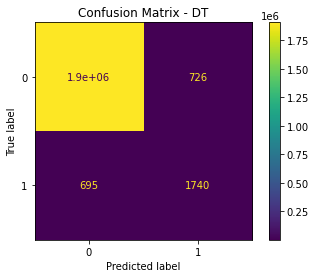

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


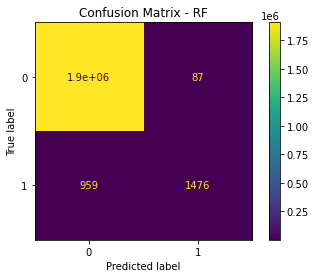

In [ ]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(classifier, X_test, Y_test) 
plt.title('Confusion Matrix - DT') 
plt.show()


plot_confusion_matrix(random_forest, X_test, Y_test) 
plt.title('Confusion Matrix - RF')  
plt.show()

##Data cleaning including missing values, outliers and multi-collinearity.
Multicollinearity means common features between independent features.I had solve it by creating a correlation heat map and finding which all features (apart from dependent features) are more than 90% correlated and drop it from dataset.

##Describe your fraud detection model in elaboration.
Developed a model for predicting fraudulent transactions , which will predict fraud.Although by checking the count of Fraud and Legal ransaction from the "is_Fraud" column, I got to know that the data is imbalanced .As count of Fraud Transaction is too less as compared to legal (no fraud ) transaction . So it is Imbalanced data ,as the No_Fraud Class has very high number of observations and the Is_Fraud Class has very low number of observations .Hence for an Imbalaced Class dataset F1 score is the most appropriate metric.
Then the model which gives best F1 score gives more accurate result.

##How did you select variables to be included in the model?
As the datset contains multicollinearity , so few features were correlated with each other . And there is no use of taking both the features for model evaluation. So dropped some highly correlated features with correlation greater than 90%,  and rest features were selected to be included in model.

##Demonstrate the performance of the model by using best set of tools. 
for evaluating the Performance of the model we calculate F1 score, Confusion Matrix, Presion etc
As the data was imbalanced so F1 score is the most appropriate metric, as F1 score keeps the balance between precision and recall. So model with high F1 score is considered as best model . Here Random Forest gives the best F1 score.

##What are the key factors that predict fraudulent customer?


1.   customer's identity like- email id , phone number ,etc.
2.   for a single account their might be multiple payments methods done within an hour.
3.   past transactions.


##Do these factors make sense? If yes, How? If not, How not? 
Yes , these factors makes sense as customer's identity like email-id , phone number. If these things does not get matched with the database that the company has then theirmight be fraud. also the past transaction may be a key factor for fraud customer prediction.

##What kind of prevention should be adopted while company update its infrastructure?

1.   never disclose your password on phone calls , as no bank/company asks for your password through phone calls.
2.   same goes with OTP(one time password)
3.   browse through safe and secured websites only
4.   Theer's always a help desk number of the company,immediately contact comapny if u feel something suspicious.

##Assuming these actions have been implemented, how would you determine if they work?


1.   Customer's getting an immediate response through text messages , if there's any trasactions from thier account.
2.  giving customer the assurity that the browser they are using is secured.











